<a href="https://colab.research.google.com/github/Sairaj-97/Deep-Learning/blob/main/supervised_word_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

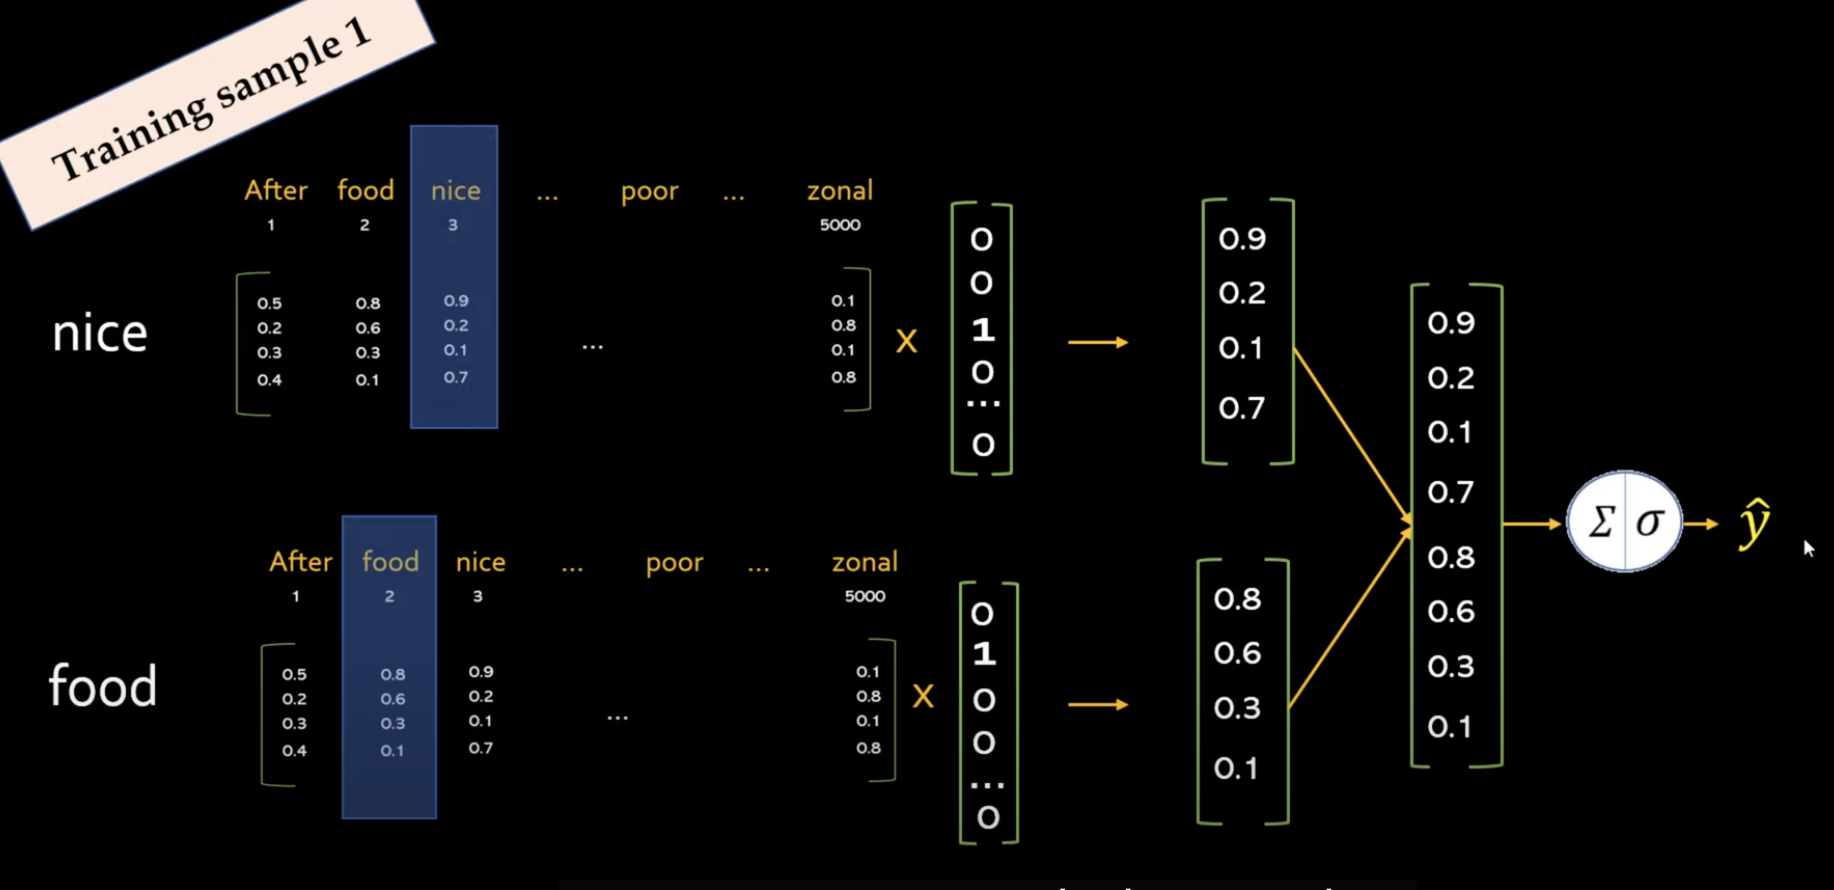

In [1]:
import numpy as np
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding

reviews = ['nice food',
        'amazing restaurant',
        'too good',
        'just loved it!',
        'will go again',
        'horrible food',
        'never go there',
        'poor service',
        'poor quality',
        'needs improvement']

sentiment = np.array([1,1,1,1,1,0,0,0,0,0])

In [2]:
#this gives a unique int value from 0-29 to each word in vocab
one_hot("amazing restaurant",30)

[17, 10]

In [3]:
vocab_size = 30
encoded_reviews = [one_hot(d, vocab_size) for d in reviews]
print(encoded_reviews)

[[8, 8], [17, 10], [19, 16], [9, 19, 15], [20, 1, 9], [24, 8], [27, 1, 20], [3, 10], [3, 20], [20, 8]]


In [4]:
max_length = 3
#pad_sequences() is used to ensure all sequences (like sentences or reviews)
# have the same length — which is necessary before feeding them into a neural
# network.
padded_reviews = pad_sequences(encoded_reviews, maxlen=max_length, padding='post')
print(padded_reviews)

[[ 8  8  0]
 [17 10  0]
 [19 16  0]
 [ 9 19 15]
 [20  1  9]
 [24  8  0]
 [27  1 20]
 [ 3 10  0]
 [ 3 20  0]
 [20  8  0]]


In [5]:
embeded_vector_size = 5
#like features of each word

model = Sequential()
model.add(Embedding(vocab_size, embeded_vector_size, input_length=max_length,name="embedding"))
#we must flatten the output
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [6]:
X = padded_reviews
y = sentiment

In [7]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [8]:
model.fit(X, y, epochs=50, verbose=0)

In [9]:
# evaluate the model
loss, accuracy = model.evaluate(X, y)
accuracy

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.9000 - loss: 0.6338


0.8999999761581421

In [10]:
weights = model.get_layer('embedding').get_weights()[0]
len(weights)

30

In [11]:
weights[13]

array([-0.03144792, -0.01378959, -0.00346152,  0.00578145, -0.04870323],
      dtype=float32)

In [12]:
weights[4]

array([-0.02930448, -0.04544371, -0.02569689,  0.04544638,  0.0494551 ],
      dtype=float32)

In [13]:
weights[16]

array([ 0.03219084,  0.01927532, -0.06380107, -0.06567716,  0.06187091],
      dtype=float32)